In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
var_name = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun']
target = 'Wh'

In [4]:
def parsing(data: pd.DataFrame):
    x = data.iloc[:, 3:8]
    x.columns = var_name
    y = data.iloc[:, 2]
    y.name = target
    
    return x, y

In [5]:
def load_data():
    data = pd.read_csv('/content/drive/MyDrive/train.csv', encoding='cp949')
    data = data[: 100]
    x, y = parsing(data)    
    cut = int(round(len(x)*0.88))
    tr_x = x[:cut]
    tr_y = y[:cut]
    te_x = x[cut:]
    te_y = y[cut:]
    return tr_x, tr_y, te_x, te_y

In [6]:
train_x, train_y, test_x, test_y = load_data()

변수 설정

In [7]:
train_x.info() #숫자임을 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp           88 non-null     float64
 1   Wind           88 non-null     float64
 2   Moisture       88 non-null     float64
 3   Precipitation  88 non-null     float64
 4   Sun            88 non-null     float64
dtypes: float64(5)
memory usage: 3.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f215cbbd710>,
      dtype=object)

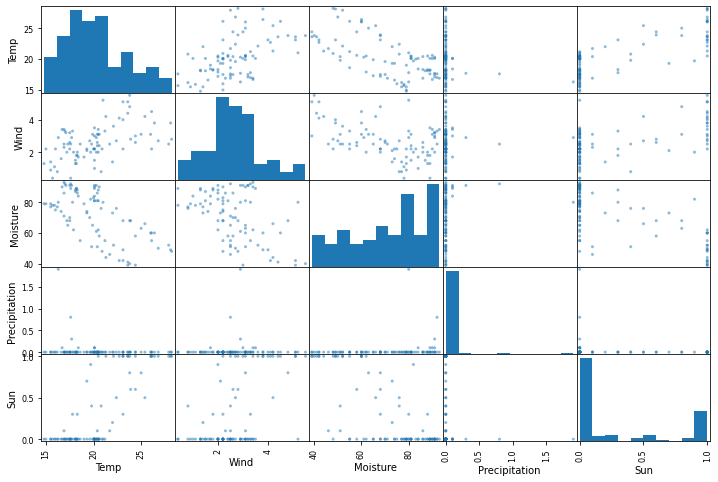

In [8]:
#변수간의 상관관계 파악을 위한 산점도 
from pandas.plotting import scatter_matrix
attributes = ["Temp",'Wind','Moisture','Precipitation','Sun']
scatter_matrix(train_x[attributes],figsize = (12,8))
#moisture - temp 가 상대적으로 뚜렷한 (음의) 상관관계를 보여서 선택했다

데이터 전처리(표준화)

In [16]:
scaler=MinMaxScaler()
scaler.fit(train_x)
trainx_scaled=scaler.transform(train_x)

In [25]:
trainx_scaled_df = pd.DataFrame(data = trainx_scaled, columns = ['Temp', 'Wind', 'Moisture', 'Precipitation', 'Sun'])

In [31]:
print(trainx_scaled_df['Temp']) #0~1의 값으로 스케일링이 된것을 확인할수있다 
print("◈"*15)
print(trainx_scaled_df['Moisture'])

0     0.208955
1     0.216418
2     0.201493
3     0.171642
4     0.164179
        ...   
83    0.679104
84    0.761194
85    0.835821
86    0.865672
87    0.791045
Name: Temp, Length: 88, dtype: float64
◈◈◈◈◈◈◈◈◈◈◈◈◈◈◈
0     0.981481
1     0.962963
2     0.962963
3     0.962963
4     0.981481
        ...   
83    0.537037
84    0.444444
85    0.388889
86    0.388889
87    0.500000
Name: Moisture, Length: 88, dtype: float64


In [32]:
scaler.fit(train_x)
trainx_scaled = scaler.transform(train_x) #학습 데이터에 대해 fit, 트랜스폼 해줬습니다 

In [33]:
test_x = scaler.transform(test_x) #테스트 데이터는 transform만 합니다 

모델 학습

In [62]:
lr = LinearRegression()
lr.fit(train_x,train_y)
lr.score(train_x,train_y)
#선형회귀로 추정

0.9308523075061211

In [50]:
from sklearn.metrics import mean_squared_error , r2_score
esti_y = lr.predict(train_x)
train_mse = mean_squared_error(train_y,esti_y)
rmse = np.sqrt(mse)
print(train_mse)
print(rmse)

2834.1185767395173
149.2361993010348


In [39]:
from sklearn.neighbors import KNeighborsClassifier #최근접 이웃 알고리즘 사용 
kn = KNeighborsClassifier()
train_y = train_y.astype('int') #타입은 int로 바꿔서 계산이 되게 했다 
kn.fit(train_x, train_y)
kn.score(train_x, train_y)

0.17045454545454544

In [49]:
esti_y1 = kn.predict(train_x)
mse = mean_squared_error(train_y,esti_y1)
rmse = np.sqrt(mse)
print(mse)
print(rmse) #mse 오차도 lr에 비해 크다 

22271.44318181818
149.2361993010348


In [40]:
from sklearn import tree        
clf = tree.DecisionTreeClassifier()
clf.fit(train_x, train_y)
clf.score(train_x, train_y) #1이 나왔다. overfitting인 것 같다.

1.0

스코어가 높게 나온 LinearRegression을 사용해 test를 합니다

In [73]:
lr = LinearRegression()
lr.fit(test_x,test_y)
lr.score(test_x,test_y)
#테스트 학습, 최종 스코어

0.8068088951458139

In [76]:
from sklearn.metrics import mean_squared_error , r2_score
pred_y = lr.predict(test_x)
test_mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
print(test_mse)
print(rmse)
#테스트 mse에 저장

334.8045392398059
149.2361993010348


성능 평가

In [69]:
def score(train_mse, test_mse):
    print(f"{test_mse/train_mse: .4f}")

In [77]:
score(train_mse,test_mse)

 0.1181
